# Barrier Crossing

## A simple example

Suppose there are $2n$ people waiting to buy tickets of \\$5 each. Half have \\$10 and the other half have \\$5. The ticket seller has no change. What is the probability that everyone will be able to buy a ticket without the ticket seller running out of change?

A few possible trajectories of 'change' are shown below. 

In [73]:
from MonteCarloPaths import BinaryPaths
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize


%matplotlib inline

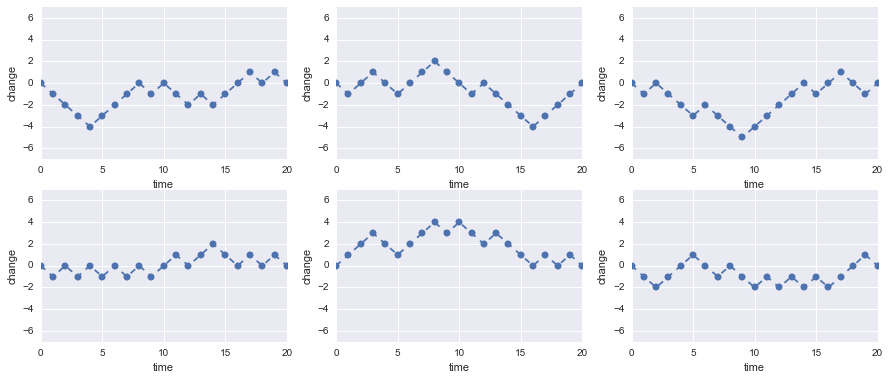

In [98]:
n=10

paths=BinaryPaths(2*n+1,1,50000) # The '+1' is for the way the trajectory is labeled, the initial location is part of timeline
paths_ending_on_zero=paths[paths[:,-1]==0]

number_columns=3
number_rows=2
figsize(15, 6)
for i,j in enumerate([(i/number_columns,i%number_columns) for i in range(number_columns*number_rows)]):
    plt.subplot2grid((number_rows,number_columns),j)
    plt.plot(paths_ending_on_zero[i],"--o")
    plt.xlabel("time")
    plt.ylabel("change")
    plt.ylim(-7,7)

plt.show()

However, our constraint means that change should never be negative so we want the fraction of such trajectories that never cross into the negative change region. 

### Computational way

The brute force computational method is given below.

In [39]:
paths_ending_on_zero_and_always_positive=paths_ending_on_zero[paths_ending_on_zero.min(1)==0]

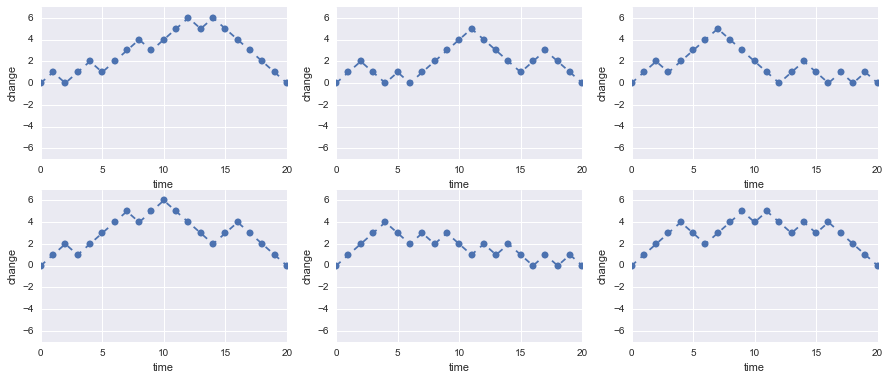

In [99]:
for i,j in enumerate([(i/number_columns,i%number_columns) for i in range(number_columns*number_rows)]):
    plt.subplot2grid((number_rows,number_columns),j)
    plt.plot(paths_ending_on_zero_and_always_positive[i],"--o")
    plt.xlabel("time")
    plt.ylabel("change")
    plt.ylim(-7,7)

plt.show()

In [86]:
from scipy.stats import sem
print "The probability to not run out of change is "+str(1.0*paths_ending_on_zero_and_always_positive.shape[0]/paths_ending_on_zero.shape[0])

The probability to not run out of change is 0.0954251386322


### Analytical way

What we want to find is the probability of ending at $0$ with the minimum of the path being $0$ also i.e.

$$
P(X(T)=0, m_t^X=0)
$$

Now, the process being continuous (in jumps of one) every path that goes negative has to pass through $X=-1$. The process being Markovian, for every such path there is another path reflected about $X=-1$ from that point onwards. This is plotted below.

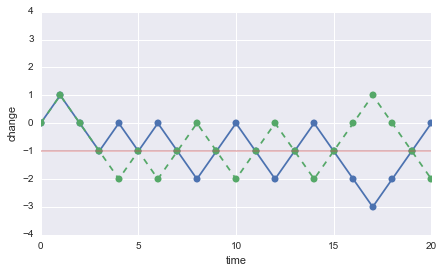

In [95]:
# calculate alternate path for one of the simulated paths
alt_path=paths_ending_on_zero[1].copy()
alt_path[4:]=-1-(paths_ending_on_zero[1][4:]-(-1))


figsize(7,4)
plt.plot(paths_ending_on_zero[1],"-o")
plt.plot(alt_path,"--o")
plt.plot(-1+np.zeros(21),alpha=.4)
plt.xlabel("time")
plt.ylabel("change")
plt.ylim(-4,4)
plt.show()

We see that for each path that goes negative there is a path that ends on -2 (as the end point $X=0$ is reflected also and becoms $X=-1 - (0- (-1))=-2$. The number of such paths is $\phantom{a}^{2n}C_{n-1} = \frac{n}{n+1}\phantom{a}^{2n}C_{n}$. Since the total number of paths ending on zero is $\phantom{a}^{2n}C_{n}$, this makes the probability of never going negative

$$
P(X(T)=0, m_t^X=0)=\frac{1}{n+1}
$$

which in our case of $n=10$ is $.091$ in accordance of what we got by simulation.